#                              Basic Exploratory Data Analysis
![](http://static.dist10.cn/Fh7Zz-ipJRPZRM9bE1p7Dsu7YLpJ/section3_bg.png?imageView2/5/w/1440/h/600)
The image is taken from the official webpage of the competition (https://location20.xyz10.com/)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import random
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Visualization of floor plans
First, we need to understand the input data. The folder "indoor-location-navigation" contains 3 subdirectories, "metadata", "test", and "train", respectively.
The following schematic shows the data structure in the "metadata" folder, as it is given in the "Data Description" tab.
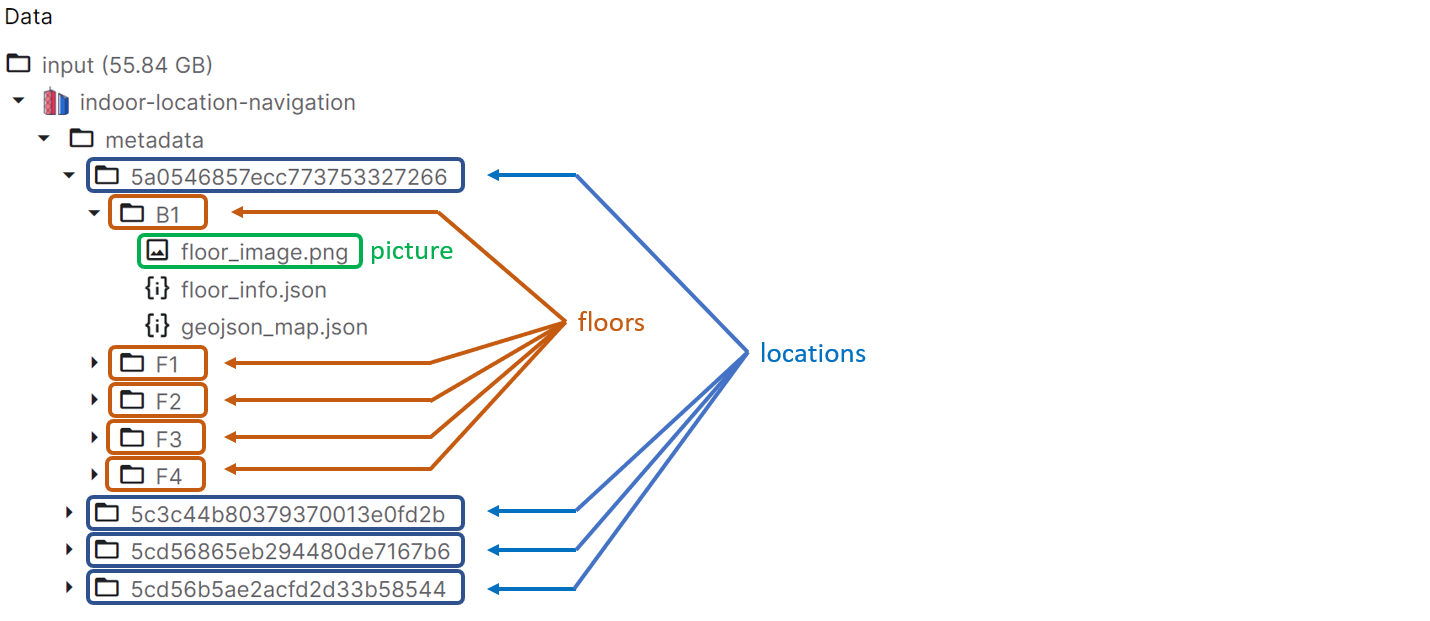
We are going to use the images in the .png format to display the locations. The other two files associated with each floor are in .json format. The floor_info.json describes the size of the location (height and width), while the geojson_map.json is a file for geospatial visualization (it is possible to reproduce a raster image in .png format using the *geopandas* library applied to this .json file).

In [ ]:
print(f"Number of location in the folder 'metadata': {len(os.listdir('/kaggle/input/indoor-location-navigation/metadata/'))}")

As one can easily check, the amount of locations in the folder "train" is also 204.

It might be useful to create some helper functions to generate a random location, and for a given location - a random floor.

In [ ]:
def select_random_location():
    '''Returns a random location from the folder 
    kaggle/input/indoor-location-navigation/metadata'.
    '''
    directory = '/kaggle/input/indoor-location-navigation/metadata'
    random_location = random.choice(os.listdir(directory))
    return random_location

def select_random_floor(location):
    '''Selecting a random floor corresponding to a given location.
    
    Args:
        location: a site from the folder 'kaggle/input/indoor-location-navigation/metadata'
    Returns:
        random_floor: one of the floors
    '''
    
    directory = '/kaggle/input/indoor-location-navigation/metadata'
    # creating a list of all floors found in the corresponding folder
    location_floors = []
    for floor in os.listdir(f'{directory}/{location}'):
        location_floors.append(floor)
    
    # selecting a random floor from the list of floors
    random_floor = random.choice(location_floors)
    return random_floor  

In [ ]:
def display_random_floor():
    '''Outputs the visualization of the random floor from the folder
    'kaggle/input/indoor-location-navigation/metadata'.
    '''
    
    directory = '/kaggle/input/indoor-location-navigation/metadata'
    location = select_random_location()
    floor = select_random_floor(location)
    
    # plotting a figure using matplotlib and PIL libraries
    plt.figure(figsize=(16, 8))
    file_path = f'{directory}/{location}/{floor}/floor_image.png'
    image = Image.open(file_path)
    plt.imshow(image)
    plt.title(f'Location: {location},\n Floor: {floor}',fontsize = 18)
    plt.axis("off")

Now, let's plot a plan of a randomly chosen floor.

In [ ]:
display_random_floor()

In [ ]:
def display_floors(location):
    '''Outputs the visualization of the .png images available
    in the folder 'kaggle/input/indoor-location-navigation/metadata'.
    
    Args:
        location: string that describes the location (or building),
              for a random location, use location = 'random'.
    Returns:
        figure with all available floors associated with the location.
    '''
    
    directory = '/kaggle/input/indoor-location-navigation/metadata'
    if location=='random':
        location = random.choice(os.listdir(directory))

    location_floors = []
    for floor in os.listdir(f'{directory}/{location}'):
        location_floors.append(floor)

    total_floors = len(location_floors)

    # Create the custom number of rows & columns
    ncols= np.int(np.ceil(total_floors/3))
    nrows = np.int(np.ceil(total_floors / ncols)) 

    plt.figure(figsize=(10*ncols, 5*nrows))
    plt.suptitle(f"Location: '{location}'", fontsize=18)


    for i, floor in enumerate(location_floors):
        plt.subplot(nrows, ncols, i+1)


        file_path = f'{directory}/{location}/{floor}/floor_image.png'
        image = Image.open(file_path)
        image = ImageOps.expand(image, border=3, fill='gray')

        plt.imshow(image)
        plt.title(floor)
        plt.axis("off")

Now, we can plot all floor plans of a randomly selected building.

In [ ]:
display_floors('random')

...or a floor plan of a given location.

In [ ]:
display_floors('5cd56bade2acfd2d33b61a61')

# Train and test data
Now, let's delve into the actual training and testing datasets. The training dataset consists of .txt files with various sensor data (timestamps, accelerometer, gyroscope, magnetometers, etc.) together with waypoint coordinates (labeled by a surveyor). We can easily count the number of trace records in both directories.

In [ ]:
directory = '/kaggle/input/indoor-location-navigation/'
train_files = sum([len(files) for _, _, files in os.walk(f"{directory}/train")])
test_files = sum([len(files) for _, _, files in os.walk(f"{directory}/test")])

print(f"Number of files in the training dataset: {train_files}.")
print(f"Number of files in the test dataset: {test_files}.")